# Flight Price Data Analysis

Welcome to this Jupyter notebook where we will explore and analyze the flight price dataset from Kaggle. This notebook is designed to be a perfect starting point for other data scientists to fork and build upon. Let's dive in!

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/flight-price-data/flight_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/flight-price-data/flight_dataset.csv'

## Data Preprocessing

Let's start by checking for any missing values and understanding the basic statistics of the dataset.

In [2]:
# Check for missing values
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [3]:
# Basic statistics of the dataset
df.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


## Feature Engineering

We will create a new column for the full date by combining the `Date`, `Month`, and `Year` columns.

In [4]:
# Create a new column for the full date
df['Full_Date'] = pd.to_datetime(df[['Year', 'Month', 'Date']].rename(columns={'Year': 'year', 'Month': 'month', 'Date': 'day'}))
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Full_Date
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,2019-03-24
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,2019-05-01
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,2019-06-09
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,2019-05-12
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,2019-03-01


## Exploratory Data Analysis (EDA)

Let's create some interesting charts to visualize the data.

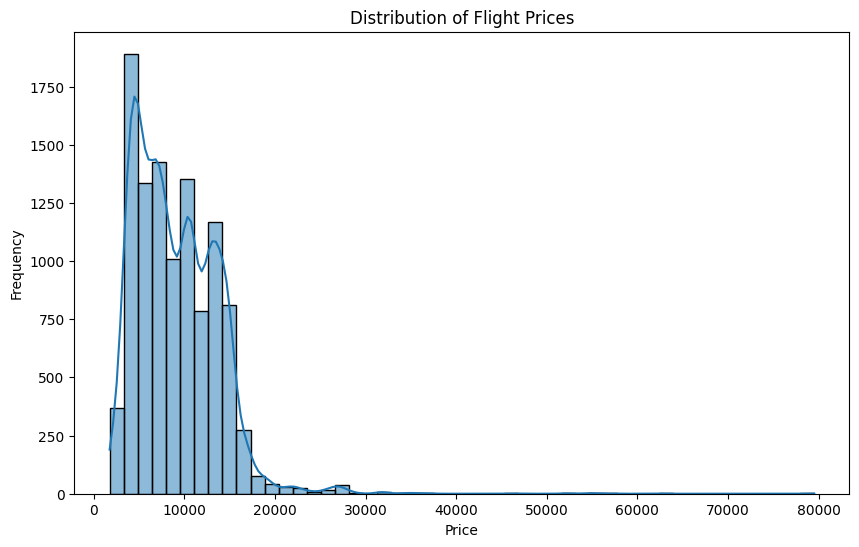

In [5]:
# Distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

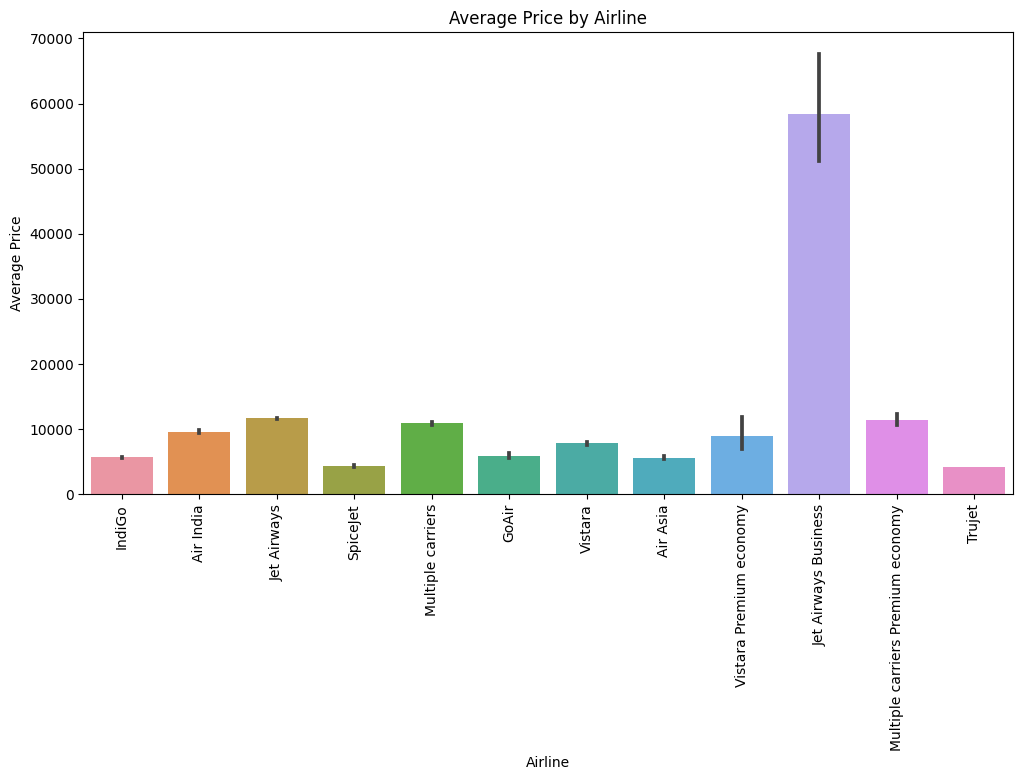

In [6]:
# Average price by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

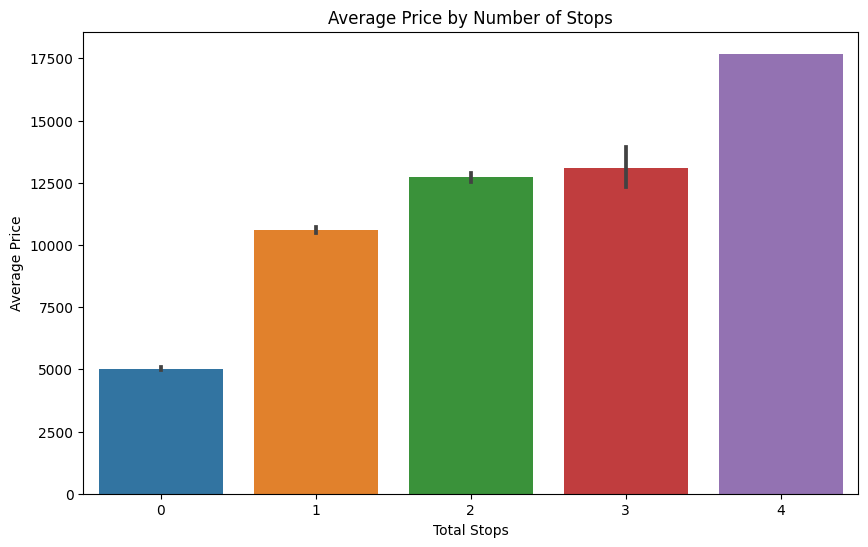

In [7]:
# Average price by number of stops
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Stops', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Number of Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.show()

## Correlation Heatmap

Let's look at the correlation between the numeric features.

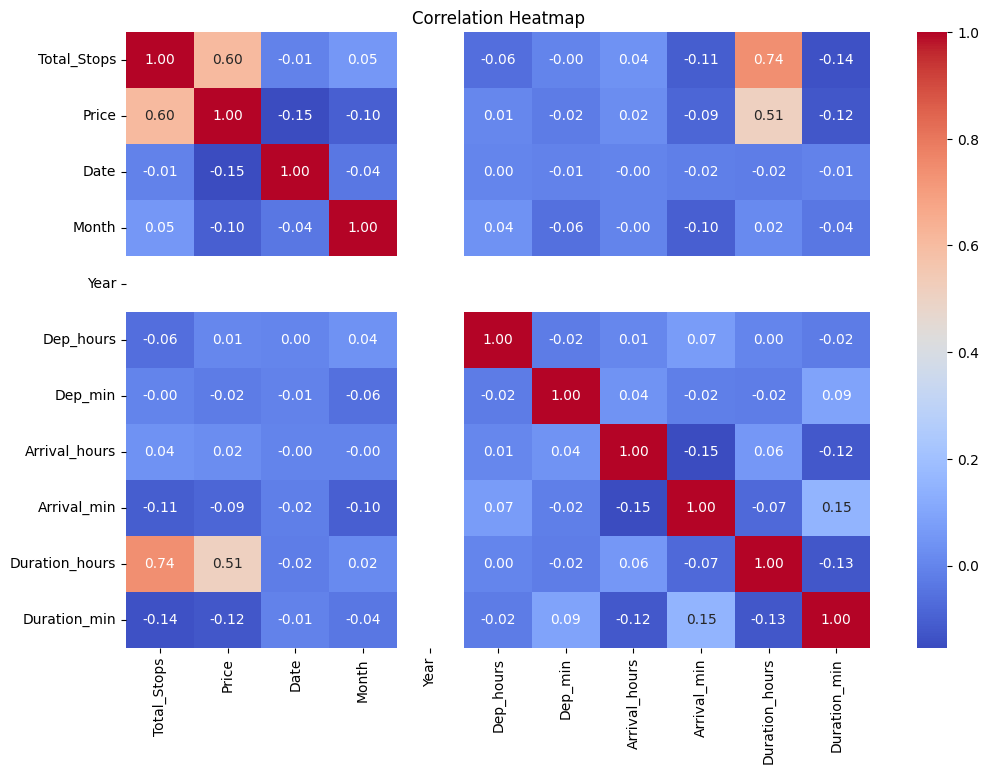

In [8]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Modeling

Based on the data, it seems useful to predict the flight price. Let's create a simple linear regression model to predict the price.

In [9]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = numeric_df.drop(columns=['Price'])
y = numeric_df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 12583522.962790491
R-squared: 0.40542699181785546


## Future Analysis Ideas

1. **Feature Engineering**: Create more features such as day of the week, holiday indicators, etc.
2. **Advanced Modeling**: Try more advanced models like Random Forest, Gradient Boosting, or even Neural Networks.
3. **Hyperparameter Tuning**: Use techniques like Grid Search or Random Search to find the best hyperparameters for the models.
4. **Time Series Analysis**: Since we have date information, we can perform time series analysis to understand trends and seasonality in flight prices.
5. **Geospatial Analysis**: Analyze the data based on the geographical locations of the source and destination.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)